In [1]:
!pip install robin_stocks
import robin_stocks.robinhood as r
import pandas as pd
import numpy as np
import math as m
import matplotlib.pyplot as plt

Library: [robin_stocks](https://readthedocs.org/projects/robin-stocks/downloads/pdf/latest/)

## Authentication and Login

In [2]:
login = r.login('kgraghav@mtu.edu','0214@Kgraghavan',store_session=True)

## List of Cryptocurrencies available

In [3]:
crypto_info=r.crypto.get_crypto_currency_pairs()
crypto_list=[]
for i in range(len(crypto_info)):
    crypto_list.append(crypto_info[i]['asset_currency']['code'])

## Read in Portfolio

In [4]:
df_portfolio=pd.read_csv('portfolio.csv')
df_portfolio.set_index('Parameters',inplace=True)
columns_list=df_portfolio.columns.tolist()
columns_dict={}
for stock in columns_list:
    stock_str_rep=stock.replace('-','.')
    columns_dict[stock]=stock_str_rep
df_portfolio.rename(columns=columns_dict,inplace=True)
df_portfolio.sort_values(by='weight',axis=1,ascending=False)

,HGSH,AAPL,V,NOK,DMLRY,KO,MCD,MA,JNJ,VWAGY,...,AXP,TTM,GPRO,IYR,DUK,XHB,OTIS,BRK.B,DIA,F
Parameters,,,,,,,,,,,,,,,,,,,,,
reward,1267.018896,800.884962,599.032676,533.855315,509.225912,527.466439,475.498041,562.337472,456.151278,565.929646,...,386.786068,290.142236,337.407200,242.991704,258.660215,276.536273,257.173065,235.812835,195.440666,264.229781
risk,1.212767,1.096215,1.268045,1.131033,1.194816,1.313989,1.220403,1.460342,1.189409,1.666285,...,2.129563,1.610965,2.056194,1.503925,1.635466,1.757827,1.880655,1.908171,1.864220,2.750553
returns_ratio,1044.734027,730.591407,472.406532,472.006664,426.196076,401.423921,389.623803,385.072390,383.510978,339.635610,...,181.626931,180.104658,164.093068,161.571674,158.156924,157.317080,136.746515,123.580548,104.837780,96.064235
weight,0.129461,0.090533,0.058540,0.058490,0.052813,0.049744,0.048281,0.047717,0.047524,0.042087,...,0.022507,0.022318,0.020334,0.020022,0.019598,0.019494,0.016945,0.015314,0.012991,0.011904
price_bound,0.165498,6.038703,9.488607,0.166541,0.823050,2.441963,8.591611,19.274875,4.856972,2.095837,...,10.196226,1.085032,0.549991,2.861450,3.148595,3.052414,3.094376,9.803524,9.789589,1.067714
suggested_investment,388.513479,271.690786,175.677541,175.528839,158.492895,149.280678,144.892475,143.199906,142.619251,126.302972,...,67.543039,66.976939,61.022583,60.084932,58.815062,58.502743,50.853005,45.956873,38.986852,35.724165


In [5]:
port_stocks=df_portfolio.columns.tolist()

Total suggested equity value is: 3000.9999999999995


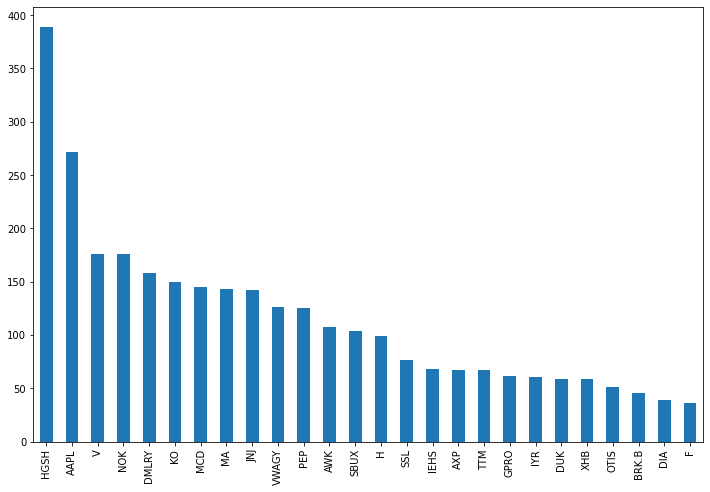

In [6]:
df_suggested_equity=df_portfolio.loc['suggested_investment',:]
df_suggested_equity.transpose().plot(kind='bar',figsize=(12,8));
total_port_equity=df_suggested_equity.sum()
print('Total suggested equity value is: {}'.format(total_port_equity))


## Print total stocks value

In [7]:
stocks_dict=r.account.build_holdings()
#print('Stocks are: {}'.format(stocks_dict))
tickers=stocks_dict.keys()
ticker_list=list(tickers)
for ticker in ticker_list:
    ticker.replace('-','.')
print(ticker_list)
###### Get crypto positions #####
crypto_holdings=r.get_crypto_positions()

['AAPL', 'TTM', 'F', 'GPRO', 'SSL', 'BRK.B', 'NOK', 'DUK', 'H', 'KO', 'XHB', 'OTIS', 'MCD', 'IYR', 'DIA', 'V', 'SBUX', 'HGSH', 'JNJ', 'MA', 'IEHS', 'VWAGY', 'DMLRY', 'PEP', 'AWK', 'AXP']


In [8]:
price_list=[float(stocks_dict[ticker]['equity']) for ticker in ticker_list]
for i in range(len(crypto_holdings)):
    crypto_ticker=crypto_holdings[i]['currency']['code'].replace('-USD','')
    crypto_qty=float(crypto_holdings[i]['cost_bases'][0]['direct_quantity'])
    crypto_mark_price=float(r.get_crypto_quote(symbol=crypto_ticker,info='mark_price'))
    crypto_price=crypto_qty*crypto_mark_price
    price_list.append(crypto_price)

In [9]:
### Add crypto position tickers to crypto_list ###
for i in range(len(crypto_holdings)):
    ticker_list.append('{}.USD'.format(crypto_holdings[i]['currency']['code']))

## Stocks common to portfolio and investment

In [10]:
comm_stocks=list(set(port_stocks).intersection(set(ticker_list)))
print('Stocks common to recommended and actual portfolio: ',comm_stocks)
port_stocks=[stock.replace('-','.') for stock in port_stocks]

Stocks common to recommended and actual portfolio:  ['F', 'BRK.B', 'VWAGY', 'KO', 'H', 'IYR', 'GPRO', 'DIA', 'AXP', 'V', 'SBUX', 'DMLRY', 'IEHS', 'XHB', 'HGSH', 'MA', 'AWK', 'MCD', 'JNJ', 'PEP', 'DUK', 'OTIS', 'TTM', 'AAPL', 'SSL', 'NOK']


## Stocks not common

### Stock in recommended portfolio but not in actual portfolio

In [11]:
not_in_ticker_list=[stock for stock in port_stocks if stock not in ticker_list]
not_in_ticker_list

[]

### Stock in  actual portfolio but not in recommended portfolio

In [12]:
not_in_port_stocks=[ticker for ticker in ticker_list if ticker not in port_stocks]
not_in_port_stocks

['LTC.USD', 'DOGE.USD', 'ETH.USD', 'BTC.USD']

## Share Price

In [13]:
share_price={}
share_price_values=[float(stocks_dict[ticker]['price']) for ticker in tickers]
for i in range(len(tickers)):
    ticker=ticker_list[i]
    share_price[ticker]=share_price_values[i]
share_price=pd.DataFrame(share_price,index=['price'])
share_price

,AAPL,TTM,F,GPRO,SSL,BRK.B,NOK,DUK,H,KO,...,SBUX,HGSH,JNJ,MA,IEHS,VWAGY,DMLRY,PEP,AWK,AXP
price,179.6399,31.54,20.785,10.685,16.335,295.5802,6.335,102.8719,95.18,58.57,...,114.08,2.3399,169.35,359.76,45.3699,29.8765,24.03,170.845,183.72,164.1846


## Share Quantity

In [14]:
share_quantity={}
share_quantities=[float(stocks_dict[ticker]['quantity']) for ticker in tickers]
for i in range(len(tickers)):
    ticker=ticker_list[i]
    share_quantity[ticker]=share_quantities[i]
share_quantity=pd.DataFrame(share_quantity,index=['quantity'])
share_quantity

,AAPL,TTM,F,GPRO,SSL,BRK.B,NOK,DUK,H,KO,...,SBUX,HGSH,JNJ,MA,IEHS,VWAGY,DMLRY,PEP,AWK,AXP
quantity,1.57,2.12,1.82,5.89,4.96,0.1558,29.35,0.5682,1.22,2.56,...,0.9178,166.761233,0.8353,0.4252,1.56,4.0,7.0,0.7342,0.5945,0.4216


## Total Equity

Total Stocks equity value is: 9637.008595698926
Total Common Stocks equity value is: 3082.6299999999997


,BTC.USD,HGSH,AAPL,NOK,V,DMLRY,MA,KO,MCD,JNJ,...,IYR,XHB,DUK,OTIS,BRK.B,DIA,F,LTC.USD,DOGE.USD,ETH.USD
Equity,6554.378596,390.2,282.03,185.93,182.69,168.21,152.97,149.94,147.95,141.46,...,61.72,59.3,58.45,52.38,46.05,39.73,37.83,0.0,0.0,0.0


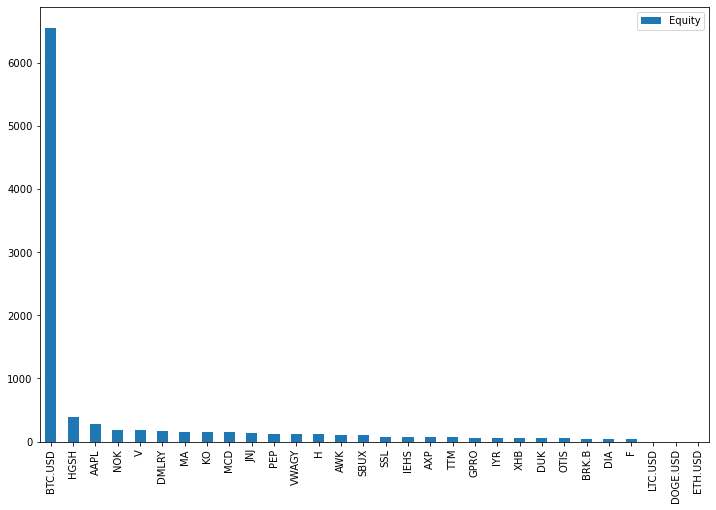

In [15]:
equity={}
total_equity=0
for i in range(len(ticker_list)):
    ticker=ticker_list[i]
    equity[ticker]=price_list[i]
    total_equity=total_equity+equity[ticker]
print('Total Stocks equity value is: {}'.format(total_equity))

equity_comm={}
total_comm_equity=0
for i in range(len(comm_stocks)):
    ticker=comm_stocks[i]
    equity_comm[ticker]=price_list[i]
    total_comm_equity=total_comm_equity+equity_comm[ticker]
print('Total Common Stocks equity value is: {}'.format(total_comm_equity))

df_equity=pd.DataFrame.from_dict(data=equity,orient='index',columns=['Equity'])
df_equity.sort_values(by='Equity',axis=0,ascending=False).plot(kind='bar',figsize=(12,8));
df_equity=df_equity.transpose()
df_equity.sort_values(by='Equity',axis=1,ascending=False)

## Equity Change

Total Common equity change value is: 81.63
Total Common Change Percent is: 2.7200933022325895


,BTC.USD,HGSH,AAPL,NOK,V,DMLRY,MA,KO,MCD,JNJ,...,IYR,XHB,DUK,OTIS,BRK.B,DIA,F,LTC.USD,DOGE.USD,ETH.USD
Equity_Change,6378.849756,214.671161,106.501161,10.401161,7.161161,-7.318839,-22.558839,-25.588839,-27.578839,-34.068839,...,-113.808839,-116.228839,-117.078839,-123.148839,-129.478839,-135.798839,-137.698839,-175.528839,-175.528839,-175.528839


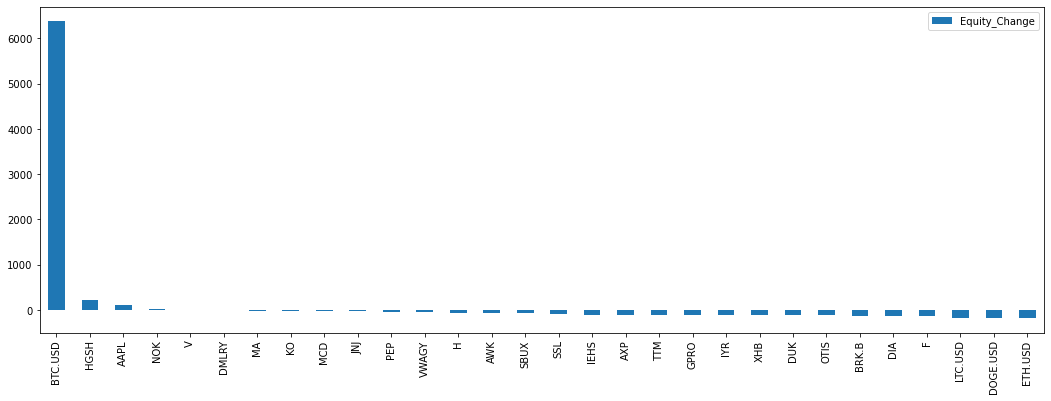

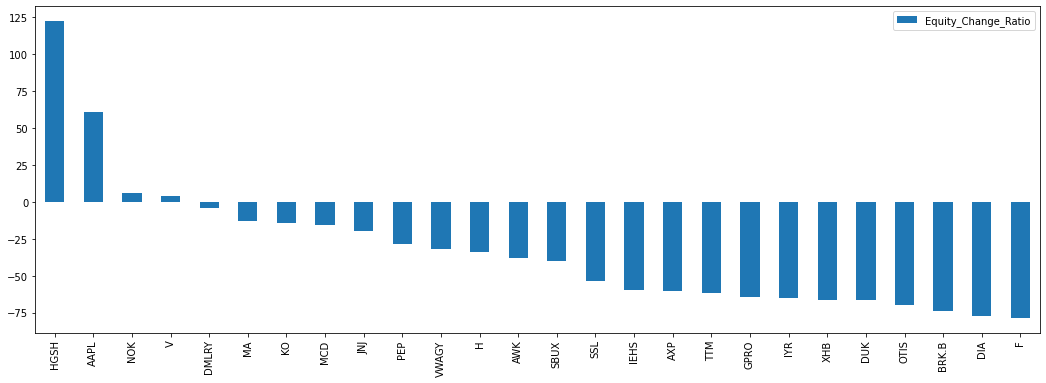

In [16]:
equity_comm_change={}
total_equity_comm_change=0
for i in range(len(comm_stocks)):
    comm_stock=comm_stocks[i]
    equity_comm_change[comm_stock]=df_equity.loc['Equity',comm_stock]-df_suggested_equity[comm_stock]
    total_equity_comm_change=total_equity_comm_change+equity_comm_change[comm_stock]
print('Total Common equity change value is: {}'.format(total_equity_comm_change))
    
equity_change={}
total_port_equity_change=0
for i in range(len(ticker_list)):
    stock=ticker_list[i]
    equity_change[stock]=df_equity.loc['Equity',stock]-df_suggested_equity[comm_stock]
    total_port_equity_change=total_port_equity_change+equity_change[stock]


equity_change_percent=total_port_equity_change/total_port_equity*100

equity_comm_change_percent=total_equity_comm_change/total_port_equity*100
print('Total Common Change Percent is: {}'.format(equity_comm_change_percent))

df_equity_change=pd.DataFrame.from_dict(data=equity_change,orient='index',columns=['Equity_Change']).transpose()

df_change_ratio=pd.DataFrame(100*df_equity_change.loc['Equity_Change',comm_stocks].
                             div(df_suggested_equity[comm_stock])).transpose()
df_change_ratio.rename(index={'Equity_Change':'Equity_Change_Ratio'},inplace=True)

df_equity_change.sort_values(by='Equity_Change',axis=1,ascending=False).transpose().plot(kind='bar',figsize=(18,6));
df_change_ratio.sort_values(by='Equity_Change_Ratio',axis=1,ascending=False).transpose().plot(kind='bar',figsize=(18,6));
df_equity_change.sort_values(by='Equity_Change',axis=1,ascending=False)

## Update Stop Loss

### Stop Loss Sell Limit Price

In [17]:
stop_loss_sell_limit_price={}
for i in range(len(comm_stocks)):
    stock=comm_stocks[i]
    try:
        stop_loss_sell_diff=df_portfolio.loc['price_bound',stock]
        limit_price=float(share_price[stock]-stop_loss_sell_diff)
        if limit_price<0:
            stop_loss_sell_limit_price[stock]=0
        else:
            stop_loss_sell_limit_price[stock]=limit_price
    except:
        print(stock)
stop_loss_sell_limit_price

{'F': 19.717285638765667,
 'BRK.B': 285.77667592827,
 'VWAGY': 27.780663300255387,
 'KO': 56.128037160555614,
 'H': 90.53835993045327,
 'IYR': 110.3985501280201,
 'GPRO': 10.135008765277876,
 'DIA': 352.01041053036954,
 'AXP': 153.988373939148,
 'V': 207.92019328468615,
 'SBUX': 110.53415455437501,
 'DMLRY': 23.206950017162924,
 'IEHS': 43.995201017461824,
 'XHB': 81.09058635626675,
 'HGSH': 2.1744020158942763,
 'MA': 340.4851246033391,
 'AWK': 178.48256450426373,
 'MCD': 259.0483893531223,
 'JNJ': 164.49302841985534,
 'PEP': 166.83869899273563,
 'DUK': 99.72330494470296,
 'OTIS': 83.1106243604782,
 'TTM': 30.454967828413587,
 'AAPL': 173.60119664482085,
 'SSL': 13.997294599771681,
 'NOK': 6.168459459930347}

### Cancel Existing Stock Orders

### Update Stop Loss Sell orders for all stocks

## Sell and Buy Stocks

### Sell all portfolio stocks

### Sell all stocks

### Buy Portfolio Stocks

#### 